# Interpolace a aproximace funkcí

V této kapitole si představíme problém aproximace a interpolace funkcí. Touto kapitolou začíná část kurzu numeriky, zabývající se funkčními závislostmi a problémy z matematické analýzy.

Problém, nazvaný *interpolace*, vychází z následující situace. Uvažujme funkci $f(x)$, pro kterou nemáme žádný analytický předpis, pouze známe hodnotu funkce na jisté množině bodů $x_0, x_1, \dots, x_{N-1}$ ($x_0 \lt x_1 \lt \dots \lt x_{N-1}$). Tyto hodnoty můžou být získany například experimentálně nebo nějakým (náročným) výpočtem. Funkce $f(x)$ pak může být potřeba k dalším výpočtům a typicky je nutné vyhodnocovat tuto funkci nejen v bodech $x_i$, ale pro libovolné $x$.

Cílem **interpolace** je získat odhad funkční závislosti funkce $f(x)$ mezi body $x_i$. Naopak **extrapolace** aproximuje funkci mimo interval $[x_0, x_{N-1}]$. Extrapolace je výrazně komplikovanější problém, proto se v této kapitole zaměříme pouze na interpolaci funkcí.

Aproximace funkcí jsou také užitečné pro další analýzu funkcí, jako například výpočet extrémů, derivací nebo integrálu. 

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Interpolace souvisí s aproximací funkcí, ale není to samé. U interpolace máme funkci zadanou v určitých bodech, které si nevybíráme. Neznáme analytický předpis a nemůžeme tedy funkci vyhodnotit v jiných bodech.

Naopak **aproximace funkce** spočívá ve zjednodušení a v urychlení vyhodnocení funkce $f(x)$ v bodě $x$. V takové situaci máme analytický předpis nebo dokážeme funkční hodnotu spočítat v libovolném bodě, ale výpočet chceme urychlit.
</p>
</div>
</div>

Důležitou součástí interpolačních metod, jako všude v numerice, je odhad chyby. Při interpolaci se vždy budeme dopouštět chyby metody, jelikož nedokážeme aproximovat funkce s libovolnou přesností na spojitém intervalu. Interpolační metody vždy předpokládají jistý stupeň hladkosti odhadované funkce. Nespojité a jiné  nepěkné funkce jsou pro interpolaci kompilací a chyba zde bude poměrně vysoká.

Ukážeme si následující typy aproximačních metod:

**Typy interpolačních metod**

1. Lokální interpolace
2. Spliny (*lokální*/*částečně nelokální*)
3. Polynomiální interpolace (*globální*) - Lagrangeovy a Newtonovy polynomy

**Další aproximační metody**

3. Čebyševovy polynomy - "nejlepší stejnoměrná aproximace"
4. Fitování funkcí - metoda nejmenších čtverců


In [1]:
import numpy as np
from scipy import linalg, interpolate, special
import matplotlib.pyplot as plt

## Lokální interpolace

Interpolace je sestavena po částech, podintervalech, na kterých je funkce aproximována zvlášť, nezávisle na ostatních bodech. V každém podintervalu je použita jiná interpolační funkce.

### Lineární interpolace

[Lineární interpolace](https://en.wikipedia.org/wiki/Linear_interpolation) je definována jako spojení úseček spojujících dvojici bodů z množiny bodů, ve kterých známe danou funkci. Uvažujme dvojici bodů $ (x_{i}, y_{i}) $ a $ (x_{i + 1}, y_{i + 1}) $, pak lokální lineární interpolace na intervalu $ (x_{i}, x_{i + 1}) $ je dána následujícím vztahem:

$$
y = y_i + \alpha (x - x_i), \qquad x \in [x_i, x_{i+1}],
$$

kde 

$$
\alpha = \frac{y_{i+1} - y_{i}}{x_{i + 1} - x_{i}}
$$

je sklon úsečky.

Ukázka lineární interpolace na funkci $\cos(x)$. V praxi často funkci neznáme analyticky, zde využíváme známou funkci pro lepší představu. Zde pouze vykreslíme funkci na několika málo bodech a tím získáme *iluzi* interpolace.

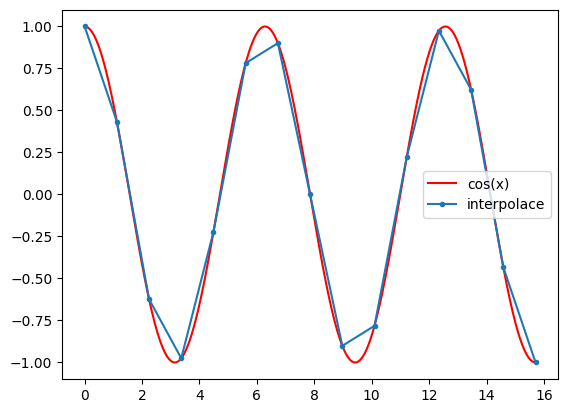

In [2]:
x = np.linspace(0, 5*np.pi, 1000) # presna funkce
xint = np.linspace(0, 5*np.pi, 15) # linearni interpolace

plt.plot(x, np.cos(x), 'r-', label='cos(x)')
plt.plot(xint, np.cos(xint), '.-', label='interpolace')
plt.legend();

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Doplňte následující funkci `linearni_interpolace()`, která pro zadanou množinu dat `x_p, y_p` spočítá lineární interpolaci. Bude tedy možné vyhodnotit funkci, aproximovanou hodnotami `x_p, y_p`, v libovolném bodě `x`.

Uvažujte již setřízené hodnoty v poli `x_p`.
</p>
</div>
</div>

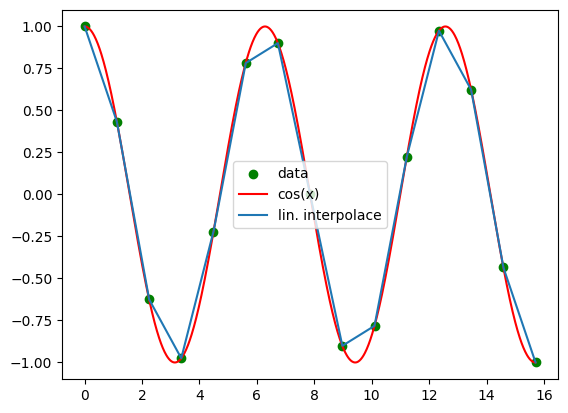

In [ ]:
def linearni_interpolace(x_p, y_p, x):
    ## DOPLŇTE ##
    for i in range(len(x_p)):
        if (x_p[i] >= x):
            break
    alpha = (y_p[i] - y_p[i-1]) / (x_p[i] - x_p[i-1])
    y = y_p[i-1] + alpha * (x - x_p[i-1])
    return y
    
# vykresleni
x = np.linspace(0, 5*np.pi, 1000)
x_p = np.linspace(0, 5*np.pi, 15)
y_p = np.cos(xint)

y = [linearni_interpolace(x_p, y_p, xi) for xi in x]
plt.scatter(x_p, y_p, c=['g'], label='data')
plt.plot(x, np.cos(x), 'r-', label='cos(x)')
plt.plot(x, y, '-', label='lin. interpolace')
plt.legend();

Lineární interpolace zajištuje knihovní funkce `scipy.interpolate.interp1d()`.

### Interpolační spline

Oproti lineární interpolaci, [interpolační spliny](https://en.wikipedia.org/wiki/Spline_interpolation) mají navíc spojitou první a vyšší derivace. Interpolace probíhá lokálně na podintervalech, na kterých je funkce aproximována polynomem. Na hranicích podintervalů, tedy ve známých bodech, jsou kladeny podmínky spojitosti a spojitosti derivací.

Pokud vyžadujeme spojitost derivací do 1. řádu, potřebujeme minimálně polynom se čtyřmi volnými parametry - **kubický spline**. Konstrukci si můžete zopakovat [zde](http://pascal.fjfi.cvut.cz/~vachal/edu/nme/cviceni/03_aprox/DOCS/teorie_kubicky_spline.pdf).

**Vlastnosti**:
* Stabilnější oproti polynomiální aproximaci
* Méně podléhají oscilacím mezi známými body (Rungeho jev)

## Globální interpolace

V globální interpolaci je ve všech podintervalech využita jedna stejná funkce.

### Lagrangeova interpolace

Lagrangeova interpolace využívá k aproximaci funkce sadu Lagrangeových polynomů. Pro $ n $ známých bodů $ (x_{i}, y_{i}) $, $ i = 0, 1, \dots, n-1 $, kde žádné dva $ x_i $ jsou stejné, [Lagrangeova interpolace](https://en.wikipedia.org/wiki/Lagrange_polynomial) je polynom $ (n-1) $-tého stupně, daný lineární kombinací:

$$
L(x) = \sum_{i = 0}^{n-1} y_i \Gamma_i(x)
$$

bází Lagrangeových polynomů a kde

$$
\Gamma_i(x) = \prod_{\substack{j = 0 \\ j \neq i}}^{n-1} \frac{x - x_j}{x_i - x_j}
$$

jsou tzv. pomocné funkce, pro které platí:

$$
\Gamma_i(x_j) = \begin{cases}
            1, & i = j,\\
            0, & i \neq j.
         \end{cases}
$$

Výsledný Lagrangeův interpolační polynom je jednoznačný.

![Lagrangeův polynom ukázka](../images/lagrange.png)

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Doplňte následující funkci `lagrangeova_interpolace()`, která pro zadanou množinu dat `x_p, y_p` spočítá interpolaci pomocí Lagrangeových polynomů.

Využijte k implementaci struktury `np.poly1d` (speciální pole koeficientů polynomu, operace s polynomy), která výrazně zjednodušuje práci s polynomy. Funkce by měla vracet polynom v tomto tvaru.
</p>
</div>
</div>

Ukázka práce s `np.poly1d`:

In [4]:
p = np.poly1d([2, 1]) # 2x + 1
print(p + 5 * p) # (2x + 1) + 5*(2x + 1)
print(p**2) # (2x + 1)^2
print(p * np.poly1d([4,0])) # (2x + 1) * 4x

 
12 x + 6
   2
4 x + 4 x + 1
   2
8 x + 4 x


        4         3         2
-2.177 x - 17.16 x + 25.03 x - 8.1 x + 0.3626


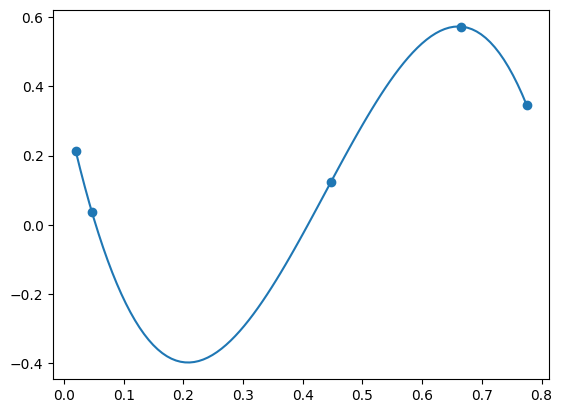

In [5]:
def lagrangeova_interpolace(x_p, y_p):
    ## DOPLŇTE ##
    n = len(x_p)
    lagrange = np.poly1d([])
    for i in range(n):
        gamma = np.poly1d([1])
        for j in range(n):
            if (j != i):
                gamma *= np.poly1d([1, -x_p[j]]) / (x_p[i] - x_p[j])
        lagrange += y_p[i] * gamma
    return lagrange

x_p = np.random.rand(5)
y_p = np.random.rand(5)
x = np.linspace(np.min(x_p), np.max(x_p), 100)
lag = lagrangeova_interpolace(x_p, y_p)
print(lag)

plt.scatter(x_p, y_p)
plt.plot(x, lag(x));

Použití Lagrangeovy interpolace na funkci $\cos(x)$.

           14             13             12             11
4.633e-25 x  - 6.826e-11 x  + 6.969e-09 x  - 3.088e-07 x 
              10             9            8            7           6
 + 7.759e-06 x  - 0.0001216 x + 0.001237 x - 0.008369 x + 0.03924 x
           5          4          3          2
 - 0.1377 x + 0.3583 x - 0.4653 x - 0.1119 x - 0.1367 x + 1


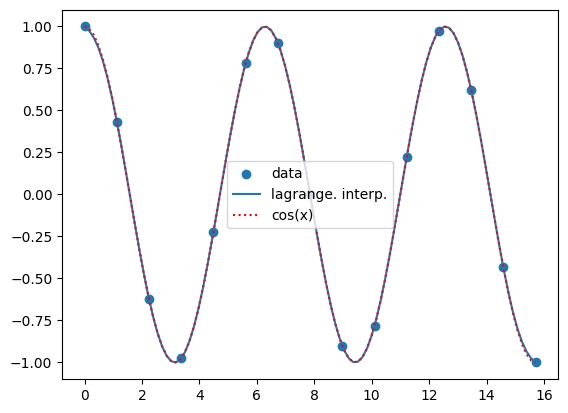

In [6]:
x_p = np.linspace(0, 5*np.pi, 15)
y_p = np.cos(x_p)
x = np.linspace(np.min(x_p), np.max(x_p), 100)
lag = lagrangeova_interpolace(x_p, y_p)
print(lag)

plt.scatter(x_p, y_p, label='data')
plt.plot(x, lag(x), label='lagrange. interp.')
plt.plot(x, np.cos(x), 'r:', label='cos(x)')
plt.legend();

Správnost implementace můžeme ověřit pomocí odpovídající knihovní funkce [`scipy.interpolate.lagrange()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html).

In [7]:
x_p = np.random.rand(10)
y_p = np.random.rand(10)
try:
    np.testing.assert_array_almost_equal(lagrangeova_interpolace(x_p, y_p), interpolate.lagrange(x_p, y_p), decimal=6)
except AssertionError as E:
    print(E)
else:
    print("The implementation is correct.")

The implementation is correct.


### Nevillův algoritmus

[Nevillův algoritmus](https://en.wikipedia.org/wiki/Neville%27s_algorithm) je alternativní rekurzivní postup pro výpočet Lagrangeova interpolačního polynomu. Je dán následujícím vztahem:

$$
L_{i, j} = \frac{(x - x_j) L_{i, j-1} - (x - x_i) L_{i+1, j}}{x_i - x_j}, \qquad L_{i, i} = y_i, \qquad i, j = 0, 1, \dots, n-1.
$$

Lagrangeoův interpolační polynom je pak $ L(x) = L_{0, n-1} $.

Výhodnou tohoto algoritmu je možnost postupného zpřesňování aproximace (**"iterovaná interpolace"**) přidáváním nových bodů. Také lze snadno odhadnout chybu aproximace rozdílem za sebou jdoucích interpolací řádu $n$ a $n-1$. Výpočet je oproti přímému postupu pomalejší, zato nepodléhá tak velké numerické chybě.

### Rungeho jev

Polynomiální interpolace je vhodná zejmána pro funkce, které se svým tvarem polynomu blíží. Naopak některé funkce nejde aproximovat polynomem přesně a dochází k silným oscilacím mezi známými *ekvidistantními* body ([Rungeho jev](https://cs.wikipedia.org/wiki/Rungeho_jev)).

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Aproximujte Rungeho funkci 
    
$$
f(x) = \frac{1}{1 + 25x^2}
$$

pomocí Lagrangeova interpolačního polynomu za použití $ 12 $ uniformě rozdělených bodů $ x_i $ na intervalu $ [-1, 1] $, spočítejte absolutní chybu aproximace a vykreslete výsledky.  
</p>
</div>
</div> 

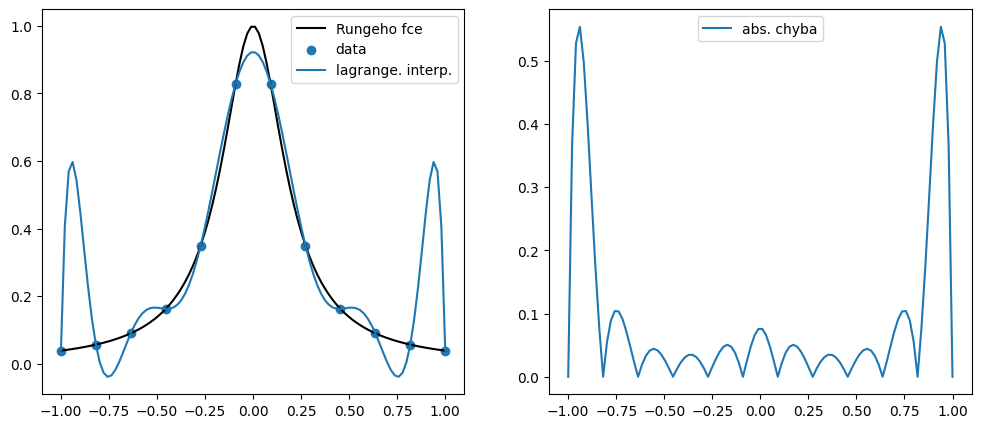

In [8]:
## DOPLŇTE ##
def f(x):
    return 1 / (1 + 25 * x**2)

N = 12
x_p = np.linspace(-1,1,N)
y_p = f(x_p)
lag = lagrangeova_interpolace(x_p, y_p)
x = np.linspace(-1,1,100)
y = f(x)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'k', label='Rungeho fce')
plt.scatter(x_p, y_p, label='data')
plt.plot(x, lag(x), label='lagrange. interp.')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x, np.abs(lag(x) - y), label='abs. chyba')
plt.legend();

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Tato ukázka ukazuje, že interpolace polynomem vysokého stupně na ekvidistatních bodech může být pro určité funkce problematická.
</p>
</div>
</div>

### Čebyševova interpolace

Pro aproximaci funkce $f(x)$ ideálně hledáme **nejlepší stejnoměrnou aproximaci**, tedy funkci $h(x)$, která na daném intervalu $[a,b]$ minimalizuje hodnotu:

$$
\max_{x \in [a,b]}{|f(x) - h(x)|}.
$$

Polynom, který je nejlepší stejnoměrnou aproximací funkce na daném intervalu $[a,b]$ mezi polynomy daného stupně, se někdy nazývá polynom *"minimax"*. Takový polynom *existuje za velmi obecných podmínek*, ale není znám jednoduchý postup, jak ho zkonstruovat ([Remezův algoritmus](https://cs.wikipedia.org/wiki/Remez%C5%AFv_algoritmus)).

**Čebyševovy polynomy**

Aproximace Čebyševovými polynomy se lehce konstruuje a je téměr tak přesná, jako nejlepší stejnoměrná aproximace. Často se používá pro výpočet funkcí.

Oproti Lagrangeově interpolaci, Čebyševova interpolace využívá předem daných nerovnoměrně rozdělených bodů. Nelze ji tedy použít na interpolaci dat, u kterých si nemůžeme vybrat polohu $x_i$.

Čebyševovy polynomy jsou definovány na intervalu $[-1, 1]$ následovně:

$$
T_n(x) = \cos(n \arccos(x)).
$$

Pro výpočet polynomu je vhodné použít rekurentní vztah:

$$
T_{n}(x) = 2 x T_{n-1}(x) - T_{n-2}(x), \quad T_0(x) = 1, \ T_1(x) = x.
$$

Čebyševův polynom $T_n(x)$ má $n$ **kořenů** v intervalu $[-1, 1]$ v bodech:

$$
x = \cos\left(\frac{\pi \left(k - \frac{1}{2}\right)}{n}\right), \quad k = 1, 2, \dots, n.
$$

**Aproximace pomocí Čebyševova polynomu**
1. Kořenů polynomu $T_n(x)$ lze použít jako kořeny Lagrangeova polynomu pro snížení vlivu Rungeho jevu. Kořeny jsou více nahromaděny k okrajím intervalu, což vede k potlační oscilací. Pro $n > 8$ je však již výhodnější použít Čebyševova polynomu.

2. *Čebyševova interpolace* - přímá konstukce Čebyševova polynomu jako aproximace funkce

Čebyševova interpolace lze spočítat následovně:

$$
f(x) \approx T(x) = \frac{1}{2} c_0 + \sum_{j=1}^{N-1}{c_j T_j(x)},
$$

kde 

$$
c_j = \frac{2}{N} \sum_{k=1}^{N} f\left[\cos\left(\frac{\pi \left(k - \frac{1}{2}\right)}{N}\right)\right] \cos\left(\frac{\pi j \left(k - \frac{1}{2}\right)}{n}\right).
$$

Hodnoty funkce $f(x)$ jsou rovny hodnotám funkce $T(x)$ ve všech $N$ nulových bodech polynomu $T_N(x)$.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Všimněte si, že oproti Lagrangeově polynomu je tvar Čebyševových polynomů obecný. Pro získání Čebyševovy interpolace je třeba vyhodnotit funkci $f(x)$ v kořenech polynomu $T_N(x)$.
</p>
</div>
</div>

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Doplňte funkci `cebysevuv_polynom()`, která počítá koeficienty [Čebyševova polynomu](https://en.wikipedia.org/wiki/Chebyshev_polynomials) stupně $ n $ s využitím rekurentního vztahu. 

Využijte k implementaci struktury `np.poly1d` (speciální pole koeficientů polynomu, operace s polynomy), která výrazně zjednodušuje práci s polynomy. Funkce by měla vracet polynom v tomto tvaru.

Vykreslete prvních 5 polynomů na intervalu $[-1, 1]$.
</p>
</div>
</div>

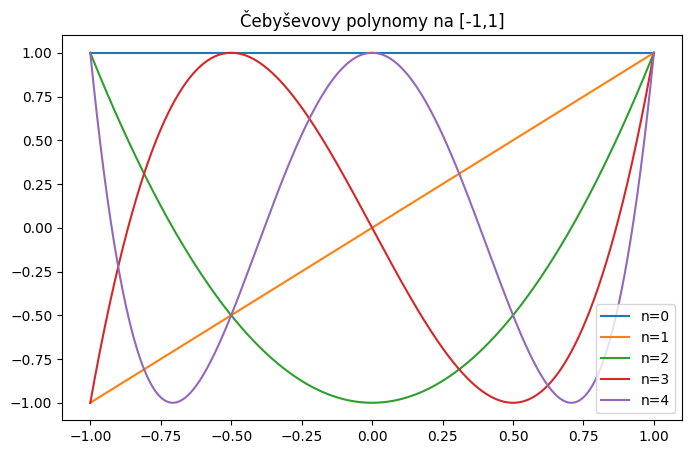

In [9]:
def cebysevuv_polynom(n):
    ## DOPLŇTE ##
    if (n == 0):
        return np.poly1d([1])
    if (n == 1):
        return np.poly1d([1, 0])
    return np.poly1d([2, 0]) * cebysevuv_polynom(n-1) - cebysevuv_polynom(n-2)

x = np.linspace(-1.0, 1.0, 1000)
plt.figure(figsize=(8,5))
for i in range(5):
    cp = cebysevuv_polynom(i)
    plt.plot(x,cp(x), label=f'n={i}')
plt.title('Čebyševovy polynomy na [-1,1]')
plt.legend();

Správnost implementace můžeme ověřit pomocí odpovídající knihovní funkce [`scipy.special.eval_chebyt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_chebyt.html).

In [10]:
n = 10
x = np.linspace(-1.0, 1.0, 1000)
try:
    np.testing.assert_array_almost_equal(cebysevuv_polynom(n)(x), special.eval_chebyt(n, x), decimal=7)
except AssertionError as E:
    print(E)
else:
    print("The implementation is correct.")

The implementation is correct.


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Doplňte funkci `cebysev_koreny()`, která počítá kořeny [Čebyševova polynomu](https://en.wikipedia.org/wiki/Chebyshev_polynomials) stupně $ n $.
</p>
</div>
</div>

[-0.98768834 -0.89100652 -0.70710678 -0.4539905  -0.15643447  0.15643447
  0.4539905   0.70710678  0.89100652  0.98768834]


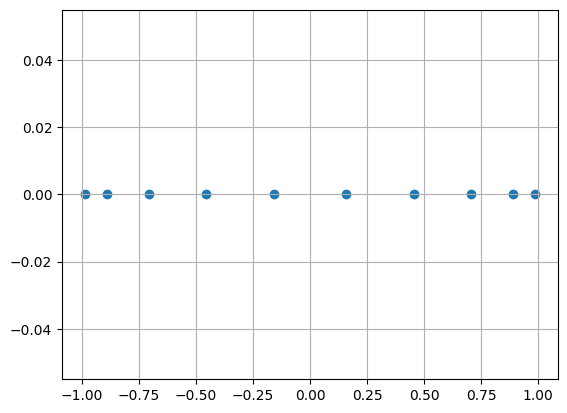

In [11]:
def cebysev_koreny(n):
    ## DOPLŇTE ##
    k = np.arange(n,0,-1)
    return np.cos(np.pi * (k - 0.5) / n)

N = 10
print(cebysev_koreny(N))
plt.scatter(cebysev_koreny(N), np.zeros(N))
plt.grid();

Správnost implementace můžeme ověřit pomocí odpovídající knihovní funkce [`scipy.special.roots_chebyt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_chebyt.html).

In [12]:
n = 10
try:
    np.testing.assert_array_almost_equal(cebysev_koreny(n), special.roots_chebyt(n)[0], decimal=7)
except AssertionError as E:
    print(E)
else:
    print("The implementation is correct.")

The implementation is correct.


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Aproximujte Rungeho funkci 
    
$$
f(x) = \frac{1}{1 + 25x^2}
$$

pomocí Lagrangeova interpolačního polynomu za použití $ 12 $ uniformě rozdělených bodů $ x_i $ na intervalu $ [-1, 1] $, spočítejte absolutní chybu aproximace a vykreslete výsledky.

na intervalu $[ -1, 1] $ pomocí Lagrangeova interpolačního polynomu za použití kořenů Čebyševova polynomu $ 12 $-tého řádu. Spočítejte absolutní chybu aproximace a vykreslete výsledky.
</p>
</div>
</div> 

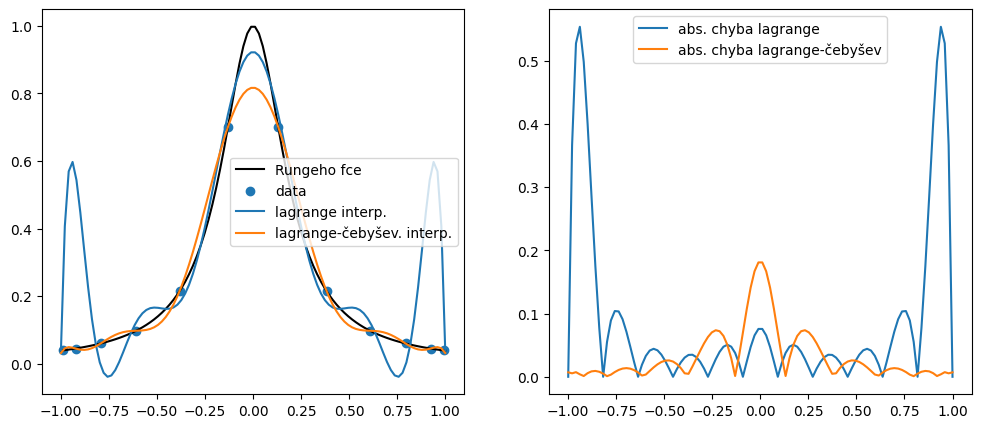

In [13]:
## DOPLŇTE ##
def f(x):
    return 1 / (1 + 25 * x**2)

N = 12
# Lagrange
x_p = np.linspace(-1,1,N)
y_p = f(x_p)
lag = lagrangeova_interpolace(x_p, y_p)

# Cebysev
x_p = cebysev_koreny(N)
y_p = f(x_p)
lagceb = lagrangeova_interpolace(x_p, y_p)
x = np.linspace(-1,1,100)
y = f(x)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'k', label='Rungeho fce')
plt.scatter(x_p, y_p, label='data')
plt.plot(x, lag(x), label='lagrange interp.')
plt.plot(x, lagceb(x), label='lagrange-čebyšev. interp.')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x, np.abs(lag(x) - y), label='abs. chyba lagrange')
plt.plot(x, np.abs(lagceb(x) - y), label='abs. chyba lagrange-čebyšev')
plt.legend();

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Čebyševovy polynomy jsou definované pouze na intervalu $[-1, 1]$. Pokud chceme aproximovat funkci na obecn0m intervalu $ [a, b] \neq [-1, 1] $, tak je třeba provést odpovídající transformaci. 

Při výpočtu kořenů $ x_i $ Čebyševovy interpolace lze použít:

$$
x_i = \frac{a + b}{2} + \frac{b - a}{2} z_i, \qquad i = 0, 1, \dots, n - 1.
$$

kde $ z_i $ je $ i $-tý kořen Čebyševova polynomu $ n $-tého stupně.

Při interpolaci lze libovolný interval $[a, b]$ transformovat na $[-1, 1]$ pomocí:

$$
x = \frac{2 t - (a + b)}{b - a}, \quad x \in [-1, 1], \quad t \in [a,b].
$$

</p>
</div>
</div>

## Modelování dat

V této podkapitole se budeme zabývat úlohou velmi podobnou **interpolaci**. U interpolace je cílem získat aproximaci funkce, kterou dokážeme vyčíslit na konečném počtu bodů, na reálném intervalu. Funkci dokážeme vyčíslit přesně až na chybu numerické metody a zaokrouhlovací chyby.

Naopak v případě **modelování dat** uvažujeme data podléhající experimentálním nebo dalším chybám - data obsahují jistou míru šumu. Tedy jednotlivé data pointy se mohou významně odchylovat od skutečné hodnoty/funkce. V takovém případě nemá smysl provádět interpolaci, u které typicky chceme, aby aproximace přesně procházela známými data pointy. U modelování, nebo také *fitování dat*, chceme proložit data vhodným modelem - křivkou. Tento model typicky známe z teorie, tedy je například znám určitý zákon nebo vzorec, kterým by se data měla řídit.

Ukážeme si metodu nejmenších čtverců, která pro libovolný tvar modelu najde **nejpravděpodobnéjší hodnoty** parametrů modelu vzhledem k daným datům (viz *Numerical Recipes kapitola 15*).

### Metoda nejmenších čtverců

Pro daných $ n $ známých data pointů $ (x_{i}, y_{i}) $, $ i = 0, 1, \dots, n-1 $, [metoda nejmenších čtverců](https://en.wikipedia.org/wiki/Least_squares) hledá aproximaci k datům pomocí minimalizace součtu čtverců reziduí (odchylka dat od modelu):

$$
S = \sum_{i = 0}^{n - 1} (y_i - f(x_i; \beta))^2,
$$

kde $ f(x_i; \beta) $ je modelová funkce a $ \beta $ je vektor parametrů modelu o velikosti $ m $. K hledání minima $ S $ lze použít několik metod. $ S $ se v optimalizaci často nazývá *účelová funkce* nebo *chyba*.

Pokud je modelová funkce lineární ve všech parametrech $\beta_i$, lze minimum spočítat přímo položením gradientu rovnu $ 0 $:

$$
\frac{\partial S}{\partial \beta_j} = \sum_{i = 0}^{n - 1} 2 r_i \frac{\partial r_i}{\partial \beta_j} = \sum_{i = 0}^{n - 1} -2 \left( y_i - f(x_i; \beta) \right) \frac{\partial f(x_i; \beta)}{\partial \beta_j} = 0, \qquad j = 0, 1, \dots, m - 1. 
$$

V opačném případě lze použít jiné minimalizační metody, jako například metodu největšího spádu (uvidíme v [kapitole 8](extremy)).

**Polynomiální modelová funkce**

V případě polynomiální modelové funkce (stupeň polynomu $m-1$):

$$
f(x; \beta) = \beta_{m-1} x^{m-1} + \beta_{m-2} x^{m-2} + \dots + \beta_1 x + \beta_0,
$$

lze položit $\nabla S = 0$ a převést hledání minima $S$ na řešení soustavy lineárních rovnic.

Vektor $ \beta $, který minimalizuje $ S $ lze tedy získat řešením systému $ m $ lineárních algebraických rovnic:

$$
\sum_{i = 0}^{n - 1} \left( y_i - \beta_{m-1} x_i^{m-1} - \beta_{m-2} x_i^{m-2} - \dots - \beta_1 x_i - \beta_0 \right) x_i^j = 0, \qquad j = 0, 1, \dots, m - 1.
$$

Systém rovnic lze dále upravit na:

$$
\beta_0 \sum_{i = 0}^{n - 1} x_i^j + \beta_1 \sum_{i = 0}^{n - 1} x_i^{j+1} + \dots + \sum_{i = 0}^{n - 1} \beta_{m-2} x_i^{j + m - 2} + \beta_{m-1} \sum_{i = 0}^{n - 1} x_i^{j + m-1} = \sum_{i = 0}^{n - 1} y_i x_i^j  
$$

a v maticové formě máme:

$$
\begin{pmatrix}
\sum 1 & \sum x_i & \cdots & \sum x_i^{m-2} & \sum x_i^{m-1} \\
\sum x_i & \sum x_i^2 & \cdots & \sum x_i^{m-1} & \sum x_i^{m} \\
\vdots & \vdots & \ddots  & \vdots & \vdots \\
\sum x_i^{m-2} & \sum x_i^{m-1} & \cdots & \sum x_i^{2m-4} & \sum x_i^{2m-3} \\
\sum x_i^{m-1} & \sum x_i^{m} & \cdots & \sum x_i^{2m-3} & \sum x_i^{2m-2} \\
\end{pmatrix} 
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots\\
\beta_{m-2} \\
\beta_{m-1}
\end{pmatrix} 
=
\begin{pmatrix}
\sum y_i \\
\sum y_i x_i \\
\vdots\\
\sum y_i x_i^{m-2} \\
\sum y_i x_i^{m-1}
\end{pmatrix}.
$$

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu nejmenších čtverců s polynomiálním modelem pro obecný stupeň polynomu $n$. Funkce `polynom_nejmensi_ctverce()` by měla vrátit koeficienty polynomu ve formátu `np.poly1d`.
</p>
</div>
</div>

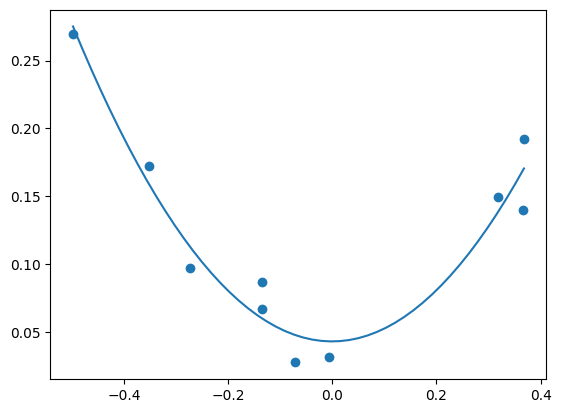

In [168]:
def polynom_nejmensi_ctverce(x_p, y_p, m):
    ## DOPLŇTE ##
    b = np.zeros(m+1)
    A = np.zeros([m+1, m+1])
    for i in range(m+1):
        for j in range(i,m+1):
            A[i,j] = A[j,i] = np.sum(x_p**(i+j))
        b[i] = np.sum(y_p * x_p**i)
        
    beta = linalg.solve(A, b)
    beta = np.flip(beta)
    return np.poly1d(beta)

x_p = np.random.rand(10) - 0.5
y_p = x_p**2 + 0.08*np.random.rand(10)

x = np.linspace(min(x_p), max(x_p))
pfit = polynom_nejmensi_ctverce(x_p, y_p, 2)
plt.scatter(x_p, y_p)
plt.plot(x, pfit(x))
plt.show()

Správnost implementace můžeme ověrit pomocí knihovní funkce [`numpy.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

In [169]:
x_p = np.random.rand(10)
y_p = np.random.rand(10)
n = 1
try:
    np.testing.assert_array_almost_equal(polynom_nejmensi_ctverce(x_p, y_p, n), np.polyfit(x_p, y_p, n), decimal=7)
except AssertionError as E:
    print(E)
else:
    print("The implementation is correct.")

The implementation is correct.


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Použijte funkci `polynom_nejmensi_ctverce()` pro fitování následujících dat, které byly vygenerovány z polynomiální funkce s přidáním gaussovského šumu. Odhadněte z tvaru dat vhodný stupeň fitovaného polynomu. Vyzkoušejte fit pro různé stupně, spočítejte výslednou chybu $S$ a porovnejte ji pro různé stupně polynomiálního fitu.
</p>
</div>
</div>

Vygenerování dat

        2
-1.351 x + 1.269 x + 2.27


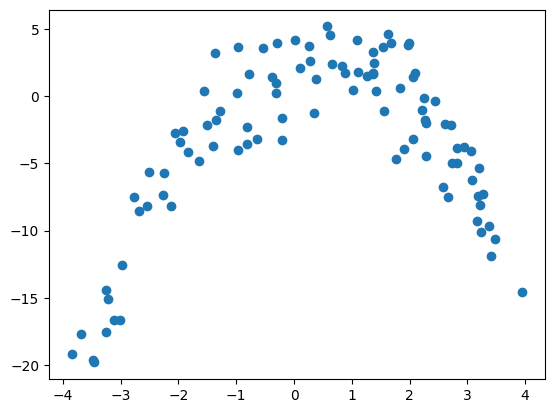

In [264]:
N = 100

a = -2.6
b = 5.4
c = -7.1
d = 7
#poly = np.poly1d([a, b, c, d])

m = int(np.random.rand()*5) + 2
poly = np.poly1d((np.random.rand(m) - 0.5) * 8)
print(poly)

xdata = (np.random.rand(N) - 0.5) * 8
ydata = poly(xdata)
ydata += np.random.normal(0, 0.1*np.max(np.abs(ydata)), size=(N))

plt.scatter(xdata, ydata)
xdataSort = np.sort(xdata)
#plt.plot(xdataSort, poly(xdataSort))
plt.show()

Polynomiální fit

error = 502.58708108497


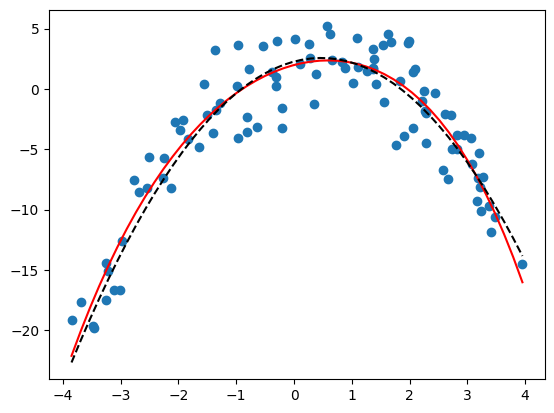

In [265]:
## DOPLŇTE ##
pfit = polynom_nejmensi_ctverce(xdata, ydata, 5)
error = np.sum((pfit(xdata) - ydata)**2)
print('error =', error)

x = np.linspace(min(xdata), max(xdata))
plt.scatter(xdata, ydata)
plt.plot(x, pfit(x), 'r')
plt.plot(x, poly(x), 'k--')
plt.show()

In [245]:
m

4

In [259]:
xdata2 = (np.random.rand(N//4) - 0.5) * 8
ydata2 = poly(xdata2)
ydata2 += np.random.normal(0, m*m, size=(N//4))

In [262]:
error = np.sum((pfit(xdata2) - ydata2)**2)
print('error valid. =', error)

error valid. = 18947.008454026618


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol - zápočet 4</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

[ZDE](ukol4)
</p>
</div>
</div>